# Data preprocessing and seperation of final test dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
patients = pd.read_csv('../myCSV/modified_patients.csv')
print('Total shape : ',patients.shape)
patients.head()

Total shape :  (1171, 15)


,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,999-76-6866,José Eduardo181,Gómez206,white,hispanic,M,Marigot Saint Andrew Parish DM,Chicopee,Massachusetts,Hampden County,271227.08,1334.88,1.0
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,999-73-5361,Milo271,Feil794,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,793946.01,3204.49,0.0
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,999-27-3385,Jayson808,Fadel536,white,nonhispanic,M,Springfield Massachusetts US,Chicopee,Massachusetts,Hampden County,574111.90,2606.40,0.0
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,999-85-4926,Mariana775,Rutherford999,white,nonhispanic,F,Yarmouth Massachusetts US,Lowell,Massachusetts,Middlesex County,935630.30,8756.19,0.0
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,999-60-7372,Gregorio366,Auer97,white,nonhispanic,M,Patras Achaea GR,Boston,Massachusetts,Suffolk County,598763.07,3772.20,0.0


In [3]:
patients.isnull().sum()

Id                      0
BIRTHDATE               0
SSN                     0
FIRST                   0
LAST                    0
RACE                    0
ETHNICITY               0
GENDER                  0
BIRTHPLACE              0
CITY                    0
STATE                   0
COUNTY                  0
HEALTHCARE_EXPENSES     0
HEALTHCARE_COVERAGE     0
non_adherence          19
dtype: int64

#### Rows in which non-adherence value is NULL will be treated as final testing dataset. So seperating it in the starting and will be working further with df having no NULL values.

In [4]:
final_testing_dataset = patients[patients['non_adherence'].isnull()]
df = patients[patients['non_adherence'].notnull()]
df['non_adherence'] = df['non_adherence'].apply(np.int64)
final_testing_dataset.shape

(19, 15)

In [5]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [6]:
print('Number of unique patients = ',df['Id'].nunique())
print('Number of records = ',df.shape[0])

Number of unique patients =  1152
Number of records =  1152


Since, Number of unique patients = Number of records. Hence , each row contains data of a different patient

# Seperating data into train-test-validation set

In [7]:
# seperating target column from main dataframe
# xtrain = df.drop('non-adherence',axis = 1)
# labels = df['non-adherence']
# xtrain.shape

# from sklearn.model_selection import train_test_split
# X_train, X, y_train, y = train_test_split(xtrain,labels,test_size=0.1,train_size=0.9)
# X_test, X_valid, y_test, y_valid = train_test_split(X,y,test_size = 0.5,train_size =0.5)

# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
# print(X_test.shape), print(y_test.shape)

In [8]:
df.shape

(1152, 15)

#### Train test validation ratio = 90% : 5% : 5%

In [9]:
train, validate, test = np.split(df.sample(frac=1, random_state=42),[int(.9*len(df)), int(.95*len(df))])

In [10]:
print(train.shape)
print(test.shape)
print(validate.shape)

(1036, 15)
(58, 15)
(58, 15)


# Exploratory Data Analysis

In [11]:
train.head()

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence
181,1c3fea30-6be0-419a-b342-50767fd55440,1984-12-27,999-76-5683,Adela471,Llamas954,white,hispanic,F,Puebla Puebla MX,Worcester,Massachusetts,Worcester County,791234.65,4830.05,1
769,51f196eb-b11e-493e-ad95-254285af055e,1963-08-07,999-89-8579,Cleopatra935,Grant908,white,nonhispanic,F,Lynn Massachusetts US,Newton,Massachusetts,Middlesex County,1158561.10,7300.88,1
597,eaf6eec1-84ec-454e-8a9a-eafd13da4241,1939-01-25,999-17-5888,Jacques50,Swift555,white,nonhispanic,M,New Bedford Massachusetts US,Raynham,Massachusetts,Bristol County,1459993.46,7894.17,1
249,8a9df121-e012-457c-ade0-ead804d93818,1923-05-15,999-25-3475,Juli424,Barton704,white,nonhispanic,F,Ware Massachusetts US,West Springfield,Massachusetts,Hampden County,1506442.89,18176.42,1
730,26ca976d-0b5b-4662-af41-535ff670dd5a,2014-09-22,999-70-4950,Shanti441,Lesch175,white,nonhispanic,F,Boston Massachusetts US,Amherst,Massachusetts,Hampshire County,124730.77,2187.36,1


In [37]:
# Printing number of unique values in of each column
# for col in df:
#     print(col ,' : ' ,df[col].nunique())

<AxesSubplot:xlabel='RACE', ylabel='count'>

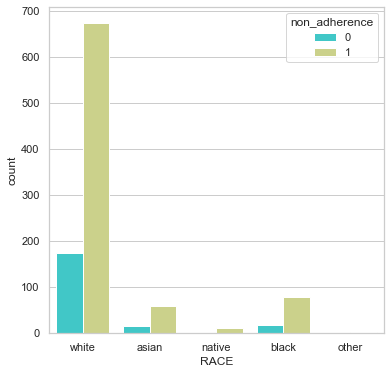

In [27]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='RACE', hue='non_adherence',palette="rainbow")
# we can conclude that maximum non_adherence was observed in white Race

<AxesSubplot:xlabel='GENDER', ylabel='non_adherence'>

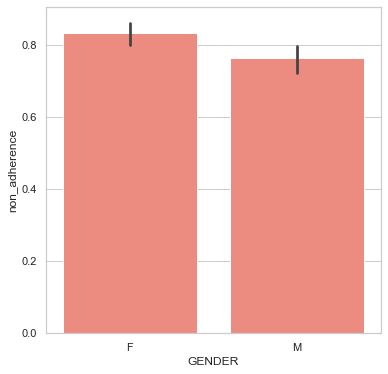

In [14]:
sns.set_theme(style="whitegrid")
sns.barplot(x = train['GENDER'], y = train['non_adherence'],color="salmon",saturation=.8)
# Females are slightly more non - adherent than males

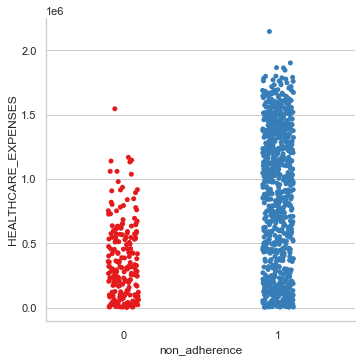

In [36]:
sns.set_theme(style="whitegrid")
sns.catplot(x="non_adherence", y="HEALTHCARE_EXPENSES", data=train,palette="Set1")
#From this graph , we can conclude that the expenses of pateits who are non_adherent are more
# Hence cost plays a major role in determining adherence

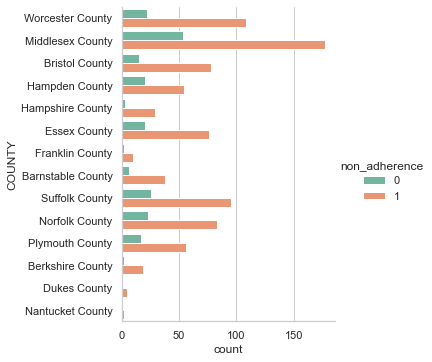

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_theme(style="whitegrid")
sns.catplot(y="COUNTY", kind="count", palette="Set2", data=train,hue = "non_adherence",ax=ax)
# Maximum patients are from Middlesex County